<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonh Selmo

#MATPLOTLIB

In [ ]:
#importando
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#gerar valores demonstrativos

#O argumento é o valor da semente; Mesmo valor de semente, trás mesmos resultados; 
#o np.random.seed() deve ser utilizado com outra função np.random (sozinha ela não faz nada)
np.random.seed(42)
x = np.arange(10)
y = np.random.normal(size=10)

In [ ]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


#PYPLOT

Plotar um único gráfico

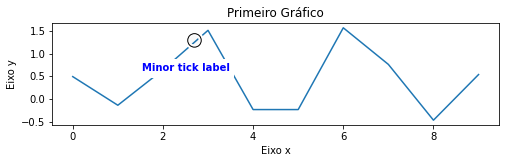

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


#plotar valores
plt.plot(x,y)
plt.title('Primeiro Gráfico')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

circle(2.70, 1.30)
text(2.50, 0.80, "Minor tick label")

plt.show()

#ABORDAGEM OO

Ao criar apenas `plt.plot()`, se trabalha com apenas um `axes`. 

[]

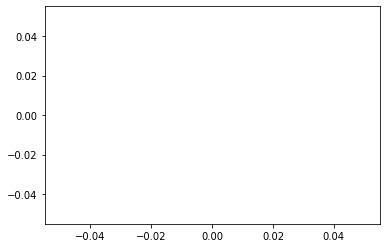

In [ ]:
plt.plot()

A forma de chamada orientada a objetos, permite a manipulação dos `axes`.

Como não foi passado nada por parâmetro, a chamada gerou apenas um `axes` (plot) na `figure`.

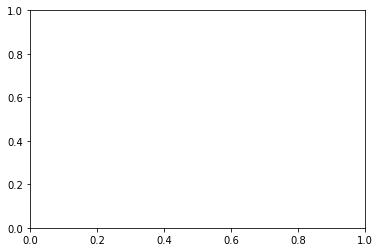

In [ ]:
fig, ax = plt.subplots()

Plotar duas funções, uma x e outra x**2.

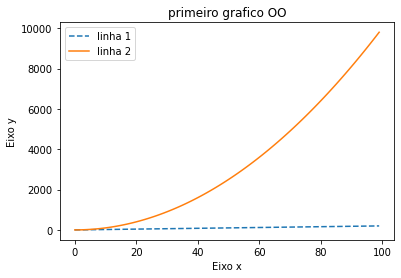

In [ ]:
#definicção dos valores de x
x = np.arange(0, 100)

#fig e axes
fig, ax = plt.subplots()
ax.plot(x, x+x, '--', label ='linha 1' )
ax.plot(x, x**2, label='linha 2')
ax.set_title('primeiro grafico OO')
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.legend()

#chamada da figura
fig.show()

Agora podemos trabalhar com manipulação de plots

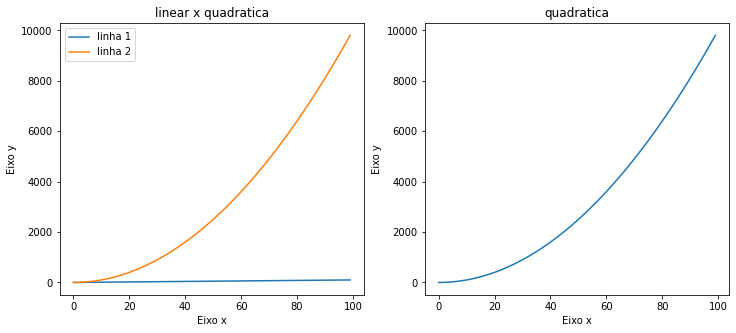

In [ ]:
#plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#manipulação dos axes
ax[0].plot(x, x, label='linha 1')
ax[0].plot(x, x**2, label = 'linha 2')
ax[0].set_title('linear x quadratica')
ax[0].set_xlabel('Eixo x')
ax[0].set_ylabel('Eixo y')
ax[0].legend()

ax[1].plot(x, x**2, label='linha 2')
ax[1].set_title('quadratica')
ax[1].set_xlabel('Eixo x')
ax[1].set_ylabel('Eixo y')

#chamando a figura
fig.show()

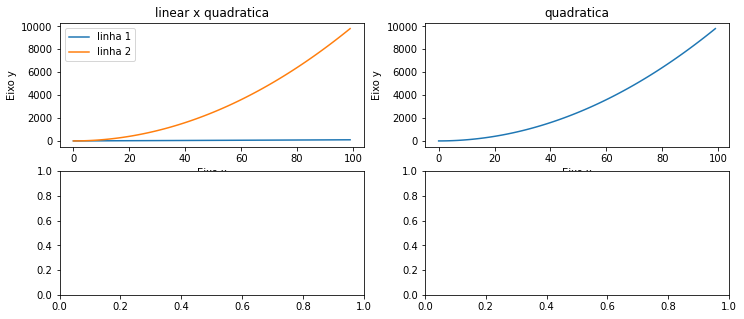

In [ ]:
#plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,5))

#manipulação dos axes
ax[0][0].plot(x, x, label='linha 1')
ax[0][0].plot(x, x**2, label = 'linha 2')
ax[0][0].set_title('linear x quadratica')
ax[0][0].set_xlabel('Eixo x')
ax[0][0].set_ylabel('Eixo y')
ax[0][0].legend()

ax[0][1].plot(x, x**2, label='linha 2')
ax[0][1].set_title('quadratica')
ax[0][1].set_xlabel('Eixo x')
ax[0][1].set_ylabel('Eixo y')

#chamando a figura
fig.show()



#GRÁFICO DE LINHAS

In [ ]:
#PANDAS
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#DATA SET
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"


In [ ]:
df = pd.read_csv(DATA_PATH)
df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


Transformar em Datetime

In [ ]:
df.data = pd.to_datetime(df.data)
df.dtypes

data                    datetime64[ns]
casos-confirmados                int64
chuva                          float64
temperatura-media              float64
temperatura-mininima           float64
temperatura-maxima             float64
dtype: object

Transformar data em index

In [ ]:
df.set_index('data', inplace=True)
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


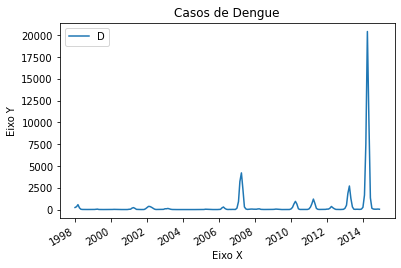

In [ ]:
#plotar casos de dengue 

#chamar modo OO
fig, ax = plt.subplots()

#1º caso
#df['casos-confirmados'].plot(kind='line', ax=ax) # é uma frma

#2º caso
ax.plot('casos-confirmados', data=df)
ax.set_title('Casos de Dengue')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.legend('Distribuicao')
#auto ajuste dos xlabel
fig.autofmt_xdate() 

plt.show()

Gráficos aninhados

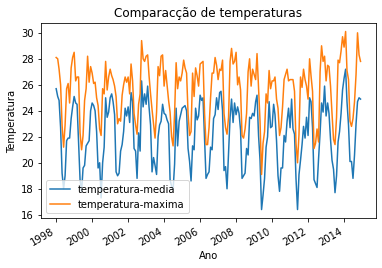

In [ ]:
fig, ax = plt.subplots()

ax.plot('temperatura-media', data=df )
ax.plot('temperatura-maxima', data=df)
ax.set_title('Comparacção de temperaturas')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura')
ax.legend()
fig.autofmt_xdate()

plt.show()


Filtro de valores

Como a data é o indice, podemos utilizar o metodo loc

In [ ]:
#Plotar valores
#Selecionar faixa de valores
df_select = df.loc['2010-01-01':'2013-12-31', 'casos-confirmados']
df_select.head()


data
2010-01-01     65
2010-02-01    249
2010-03-01    626
2010-04-01    942
2010-05-01    630
Name: casos-confirmados, dtype: int64

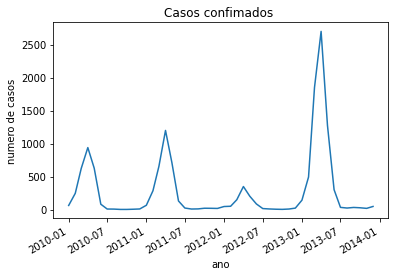

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_select, label='Gráfico comparativo')
ax.set_title('Casos confimados ')
ax.set_xlabel('ano')
ax.set_ylabel('numero de casos')
fig.autofmt_xdate()
plt.show()

##Subplots

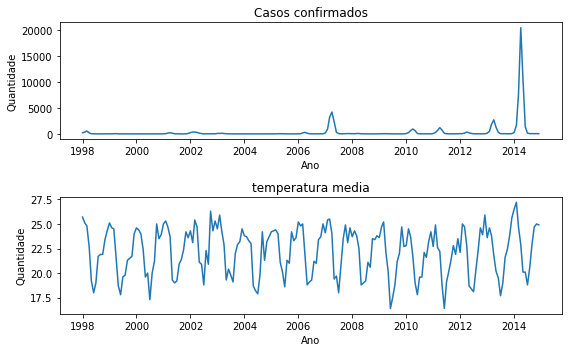

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5))

ax[0].plot('casos-confirmados', data=df)
ax[0].set_title('Casos confirmados')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Quantidade')
#fig.autofmt_xdate()

ax[1].plot('temperatura-media', data=df)
ax[1].set_title('temperatura media')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Quantidade')
#fig.autofmt_xdate()

#ajusta melhor enquadramento dos gráficos
plt.tight_layout()

plt.show()

#HISTOGRAMA



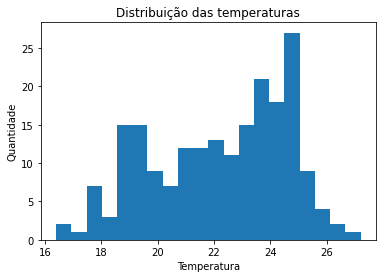

In [ ]:
fig, ax = plt.subplots()

#chama o histograma no lugar de plot
ax.hist('temperatura-media', data=df, bins=20)
ax.set_title('Distribuição das temperaturas')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Quantidade')

plt.show()

##Densidade e cor

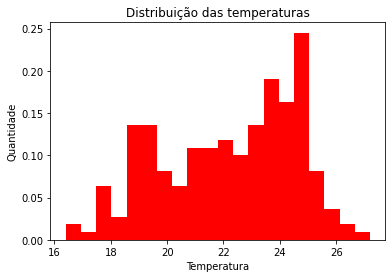

In [ ]:
fig, ax = plt.subplots()

#chama o histograma no lugar de plot
#density
ax.hist('temperatura-media', data=df, bins=20, color='red', density=True)
ax.set_title('Distribuição das temperaturas')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Quantidade')

plt.show()

#GRÁFICO DE BARRAS

In [1]:
#importacao
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv"

df_metro = pd.read_csv(DATA_PATH)
df_metro.head()

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0


In [ ]:
df_metro.tail()

,Estação,Entradas
19,Santana,64.000
20,Jardim São Paulo-Ayrton Senna,14.000
21,Parada Inglesa,16.000
22,Tucuruvi,70.000
23,TOTAL,1.425


In [ ]:
df_metro.drop(index=23, axis=0)

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0
5,Santa Cruz,108.0
6,Vila Mariana,25.0
7,Ana Rosa¹,88.0
8,Paraíso¹,115.0
9,Vergueiro,30.0


In [ ]:
df_metro = df_metro.drop(index=23, axis=0)

#outra alternativa seria essa, para não fazer df_metro receber df_metro..., como fiz acima
#df.drop(index=23, axis=0, inplace=True)

In [ ]:
df_metro.tail()

,Estação,Entradas
18,Carandiru,15.0
19,Santana,64.0
20,Jardim São Paulo-Ayrton Senna,14.0
21,Parada Inglesa,16.0
22,Tucuruvi,70.0


##Plotar o gráfico


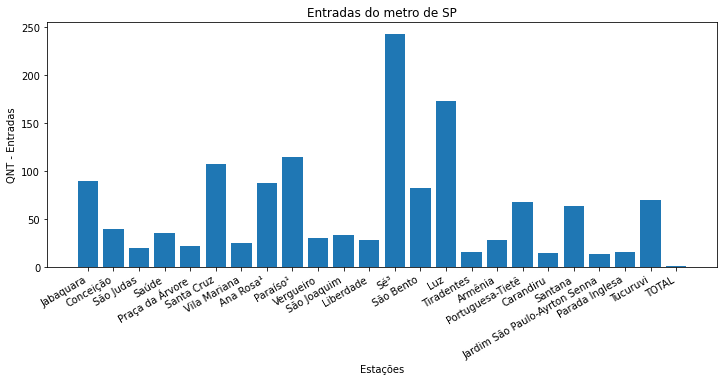

In [3]:
fig, ax = plt.subplots(figsize=(12,5))

ax.bar('Estação', 'Entradas', data = df_metro, )
ax.set_title('Entradas do metro de SP')
ax.set_xlabel('Estações')
ax.set_ylabel('QNT - Entradas')
ax.set_label(True)
#fig.tight_layout
fig.autofmt_xdate()

#SCATTER PLOT

Ele permite plotar de maneira bidimensional a relação existente entre duas variáveis.